In [6]:
from sklearn.neighbors import KernelDensity
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X)
kde.score_samples(X)

array([-0.41075698, -0.41075698, -0.41076071, -0.41075698, -0.41075698,
       -0.41076071])

In [7]:
from sklearn.neighbors import KernelDensity
import numpy as np
rng = np.random.RandomState(42)
X = rng.random_sample((100, 3))
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(X)
log_density = kde.score_samples(X[:3])
log_density

array([-1.52955942, -1.51462041, -1.60244657])

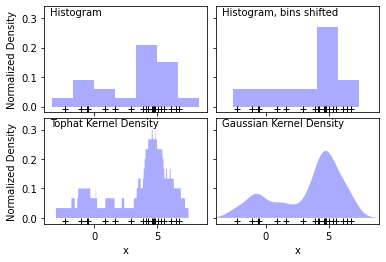

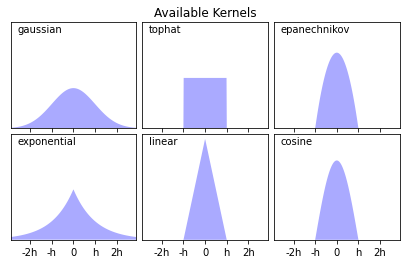

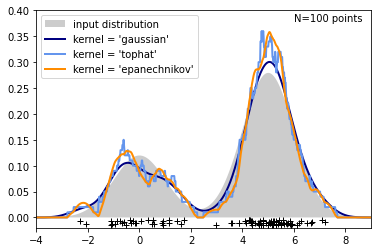

In [8]:
# Author: Jake Vanderplas <jakevdp@cs.washington.edu>
#
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from sklearn.utils.fixes import parse_version

# `normed` is being deprecated in favor of `density` in histograms
if parse_version(matplotlib.__version__) >= parse_version("2.1"):
    density_param = {"density": True}
else:
    density_param = {"normed": True}

# ----------------------------------------------------------------------
# Plot the progression of histograms to kernels
np.random.seed(1)
N = 20
X = np.concatenate(
    (np.random.normal(0, 1, int(0.3 * N)), np.random.normal(5, 1, int(0.7 * N)))
)[:, np.newaxis]
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
bins = np.linspace(-5, 10, 10)

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.05, wspace=0.05)

# histogram 1
ax[0, 0].hist(X[:, 0], bins=bins, fc="#AAAAFF", **density_param)
ax[0, 0].text(-3.5, 0.31, "Histogram")

# histogram 2
ax[0, 1].hist(X[:, 0], bins=bins + 0.75, fc="#AAAAFF", **density_param)
ax[0, 1].text(-3.5, 0.31, "Histogram, bins shifted")

# tophat KDE
kde = KernelDensity(kernel="tophat", bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 0].fill(X_plot[:, 0], np.exp(log_dens), fc="#AAAAFF")
ax[1, 0].text(-3.5, 0.31, "Tophat Kernel Density")

# Gaussian KDE
kde = KernelDensity(kernel="gaussian", bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 1].fill(X_plot[:, 0], np.exp(log_dens), fc="#AAAAFF")
ax[1, 1].text(-3.5, 0.31, "Gaussian Kernel Density")

for axi in ax.ravel():
    axi.plot(X[:, 0], np.full(X.shape[0], -0.01), "+k")
    axi.set_xlim(-4, 9)
    axi.set_ylim(-0.02, 0.34)

for axi in ax[:, 0]:
    axi.set_ylabel("Normalized Density")

for axi in ax[1, :]:
    axi.set_xlabel("x")

# ----------------------------------------------------------------------
# Plot all available kernels
X_plot = np.linspace(-6, 6, 1000)[:, None]
X_src = np.zeros((1, 1))

fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)
fig.subplots_adjust(left=0.05, right=0.95, hspace=0.05, wspace=0.05)


def format_func(x, loc):
    if x == 0:
        return "0"
    elif x == 1:
        return "h"
    elif x == -1:
        return "-h"
    else:
        return "%ih" % x


for i, kernel in enumerate(
    ["gaussian", "tophat", "epanechnikov", "exponential", "linear", "cosine"]
):
    axi = ax.ravel()[i]
    log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(X_plot)
    axi.fill(X_plot[:, 0], np.exp(log_dens), "-k", fc="#AAAAFF")
    axi.text(-2.6, 0.95, kernel)

    axi.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    axi.xaxis.set_major_locator(plt.MultipleLocator(1))
    axi.yaxis.set_major_locator(plt.NullLocator())

    axi.set_ylim(0, 1.05)
    axi.set_xlim(-2.9, 2.9)

ax[0, 1].set_title("Available Kernels")

# ----------------------------------------------------------------------
# Plot a 1D density example
N = 100
np.random.seed(1)
X = np.concatenate(
    (np.random.normal(0, 1, int(0.3 * N)), np.random.normal(5, 1, int(0.7 * N)))
)[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_dens = 0.3 * norm(0, 1).pdf(X_plot[:, 0]) + 0.7 * norm(5, 1).pdf(X_plot[:, 0])

fig, ax = plt.subplots()
ax.fill(X_plot[:, 0], true_dens, fc="black", alpha=0.2, label="input distribution")
colors = ["navy", "cornflowerblue", "darkorange"]
kernels = ["gaussian", "tophat", "epanechnikov"]
lw = 2

for color, kernel in zip(colors, kernels):
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(
        X_plot[:, 0],
        np.exp(log_dens),
        color=color,
        lw=lw,
        linestyle="-",
        label="kernel = '{0}'".format(kernel),
    )

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc="upper left")
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), "+k")

ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)
plt.show()

## PCW Starts here

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

In [10]:
data = pd.read_csv('anonymized.csv')
data.insert(0, "Day", data["Date"].transform(lambda x: x[:2]))
data["Date"] = data["Date"].transform(lambda x: x[2:])
data = data.sort_values("Date")
data = data.reset_index(drop=True)
data

,Day,Date,Amount
0,03,Apr2014,-250.00
1,19,Apr2014,-143.99
2,19,Apr2014,-154.52
3,22,Apr2014,-169.04
4,23,Apr2014,-198.00
...,...,...,...
2513,22,Sep2017,-1250.00
2514,01,Sep2017,-860.00
2515,04,Sep2017,-149.90
2516,26,Sep2017,-3815.00


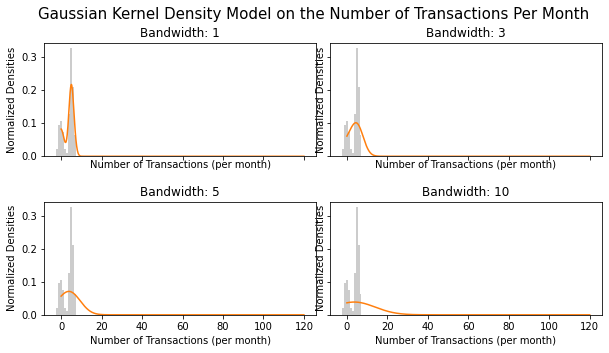

In [11]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=[10, 5])
fig.subplots_adjust(wspace=0.05, hspace=0.4)
X_plot = np.linspace(0, 120, 1000)[:, np.newaxis]
bw = [1, 3, 5, 10]
for i, bandwidth in enumerate(bw):
    ax[i//2, i%2].hist(X, density=True, fc="black", alpha=0.2)
    kde = KernelDensity(kernel="gaussian", bandwidth=bandwidth).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax[i//2, i%2].plot(X_plot[:, 0], np.exp(kde.score_samples(X_plot)), label=f"Bandwidth: {bandwidth}")
    ax[i//2, i%2].set_title(f"Bandwidth: {bandwidth}")
    ax[i//2, i%2].set_xlabel("Number of Transactions (per month)")
    ax[i//2, i%2].set_ylabel("Normalized Densities")
fig.suptitle("Gaussian Kernel Density Model on the Number of Transactions Per Month", size=15)
fig.align_xlabels()
plt.show()

In [12]:
i = 0
X = []
while i < len(data["Date"]):
    date = data["Date"][i]
    count = 0
    while i < len(data["Date"]) and data["Date"][i] == date:
        count += 1
        i += 1
    X.append(count)
X = np.array(X).reshape(-1, 1)
print(X.shape)

(49, 1)


In [13]:
import numpy as np

p_cluster = [0.4, 0.3, 0.15, 0.15]

n_questions = 20
n_people = 1000
n_clusters = len(p_cluster)

biases = np.random.beta(0.75, 0.75, size=(n_questions, n_clusters))
people = np.random.choice(range(n_clusters), size=n_people, p=p_cluster)

answers = np.zeros((n_people, n_questions), dtype=bool)

for a in range(n_people):
    cluster = people[a]
    answers[a, :] = np.random.rand(n_questions) < biases[:, cluster]

print(people)

np.savetxt("questionnaire.csv", answers, delimiter=",", fmt="%d")
np.savetxt("questionnaire_answers.csv", people, delimiter=",", fmt="%d")
np.savetxt("questionnaire_biases.csv", biases, delimiter=",", fmt="%.3f")


[2 0 2 0 1 0 0 0 1 1 1 0 1 3 2 1 3 3 1 0 0 0 1 0 3 0 3 2 2 1 1 1 0 0 1 2 1
 1 0 0 2 0 3 0 0 1 2 1 0 0 1 1 2 0 0 1 2 0 1 1 1 3 1 0 1 3 2 1 1 1 0 1 1 0
 3 0 2 0 2 1 2 0 0 2 0 2 2 0 0 0 0 0 0 0 1 2 0 0 0 3 2 1 0 2 1 3 2 1 0 3 0
 0 1 1 0 2 0 1 2 0 1 2 1 1 0 2 3 1 2 0 2 0 0 0 0 3 0 1 1 0 0 0 1 0 0 0 2 0
 3 0 1 0 2 0 1 2 0 1 0 2 2 0 3 0 3 1 1 2 2 3 0 0 3 3 2 1 2 2 0 2 2 1 1 1 0
 2 3 0 0 0 0 3 1 0 0 0 1 0 1 1 2 1 0 1 0 1 0 1 3 1 2 1 1 0 1 3 1 2 1 1 2 0
 1 3 1 0 2 0 2 1 3 1 2 0 3 0 0 3 0 2 3 1 0 2 1 0 3 3 1 3 1 1 0 1 0 3 0 0 0
 0 2 1 2 1 2 1 2 1 1 0 0 0 1 0 1 3 0 3 1 0 3 1 0 2 1 0 0 1 0 2 0 1 1 3 3 0
 1 3 1 3 0 1 1 0 0 1 3 0 2 0 0 0 2 1 1 0 1 0 1 0 0 0 1 2 1 1 0 0 1 3 0 1 1
 1 0 0 0 2 2 1 1 0 1 0 3 1 1 0 1 3 3 1 0 1 1 1 1 1 2 2 1 3 0 3 0 0 1 0 1 0
 0 0 2 1 0 0 2 0 2 1 1 0 1 0 0 1 0 1 3 0 2 1 3 0 0 3 0 3 1 0 3 0 1 0 1 0 1
 3 3 1 2 2 1 1 0 0 0 2 1 1 3 1 1 0 0 1 0 0 1 3 0 1 1 2 0 0 0 2 0 2 0 0 0 0
 0 1 0 0 0 0 1 1 0 1 3 2 1 3 0 0 1 0 3 1 1 3 1 3 0 0 0 1 0 1 0 0 3 0 0 1 1
 0 3 3 2 0 1 0 1 3 0 1 0 

In [14]:
import numpy as np

answers = np.loadtxt("questionnaire.csv", delimiter=",")
n_people, n_questions = answers.shape
n_clusters = 4

p_clusters = np.asarray([0.25, 0.25, 0.25, 0.25])
biases = np.random.beta(0.75, 0.75, size=(n_questions, n_clusters))


def expectation(answers, biases, p_clusters):
    # In this function we create our expectations.

    # This is probably not the correct answer!
    people = np.random.rand(n_people, n_clusters)

    # normalize the distributions
    people = people / people.sum(axis=1, keepdims=1)
    return people


def maximization(answers, people):
    # Treating all the data as visible, now infer the parameters for the model.

    # This is probably not the correct answer!
    biases = np.zeros((n_questions, n_clusters)) + 0.5
    return biases


for step in range(10):
    people = expectation(answers, biases, p_clusters)
    biases = maximization(answers, people)

print(biases)
print(people)


[[0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]]
[[0.19903277 0.35105131 0.39140879 0.05850713]
 [0.29863853 0.29553441 0.23774945 0.1680776 ]
 [0.34727697 0.19042534 0.23131082 0.23098687]
 ...
 [0.46725206 0.03736786 0.46946507 0.02591501]
 [0.44407459 0.36004487 0.15883043 0.03705012]
 [0.31478609 0.09545005 0.23378099 0.35598287]]
